# Dominio de la frecuencia II

Continuamos en esta práctica trabajando en el dominio de la frecuencias de las señales

## Señales continuas
### Transformada de Fourier

La mayor parte de las señales de interés pueden descomponerse en una suma de componentes sinusoidales. 


Tal y como vimos en la práctica anterior,  para señales períodicas esta descomposición se denomina serie de Fourier, mientras que para **señales aperiódicas (señales de energía) esta descomposición se denomina  Transformada de Fourier**.



A nivel práctico, el análisis en frecuencia para señales en el dominio del tiempo  se realiza empleando un procesador digital de señales, que puede ser una computadora digital de propósito general o sobre un hardware especialmente diseñado. Esto tiene gran importancia porque requiere de una representación apropiada tanto para la entrada de datos  como para la salida, es decir, tratar con secuencias continuas (a la entrada o a la salida) no es lo más adecuado computacionalmente.

Las librerías de matemática simbólica como, por ejemplo,  [Sympy](https://www.sympy.org/), son una buena aproximación para lidiar con las transformadas en tiempo continuo.


Recordamos brevemente las ecuaciones vistas en la teoría para desarrollar la transformada de Fourier

#### Ecuación de análisis - Transformada directa

Esta ecuación nos permite obtener la transformada de Fourier dada una señal aperiódica en tiempo continuo


$\large X(F)=\int\limits_{-\infty}^{\infty} x(t)e^{-j2\pi Ft}dt $


Fijaos que  $X(F)$ es una función de variable continua $F$ que no depende del período o la frecuencia fundamental  (la señal es aperiódica)


#### Ecuación de síntesis - Transformada inversa

Esta ecuación nos permite reconstruir una señal en base a su transformada de Fourier, es decir, es la representación de la señal en el dominio de la frecuencia

$\large  x(t)=\int\limits_{-\infty}^{\infty} X(F)e^{j2\pi Ft}dF$


Fijaos que en este caso se integra sobre $F$.



#### Transformada de Fourier y Sympy

Sympy tiene una función para desarrollar la transformada de Fourier [fourier_transform](https://docs.sympy.org/latest/modules/integrals/integrals.html?highlight=fourier#sympy.integrals.transforms.fourier_transform)

Su estructura básica es: 

```Python
import sympy as sp

sp.fourier_transform(f, x, k)
```
 
 * **f**: representa la señal en el dominio del tiempo
 * **x**: representa la variable simbólica de la que depende la señal de entrada como, por ejemplo, el tiempo *t*
 * **k**: Es la frecuencia que vamos a analizar. Es nuestra variable continua *F* en las ecuaciones mostradas anteriormente. Lo podemos dejar como una variable simbólica a la que le damos valor al *plotear*
 
**Nota**: uso los nombres de variables que usa Sympy en su API (para que podáis buscar/interpretar en su documentación), aunque a veces no coincida con el símbolo usado en nuestra teoría
 
#### Ejemplo de uso
Vamos a ver un ejemplo sencillo para ver como utilizar la función. Queremos obtener la **transformada de Fourier de una impulso rectangular entre $\frac{-\pi}{2}$ y $\frac{\pi}{2}$** con la forma mostrada a continuación 





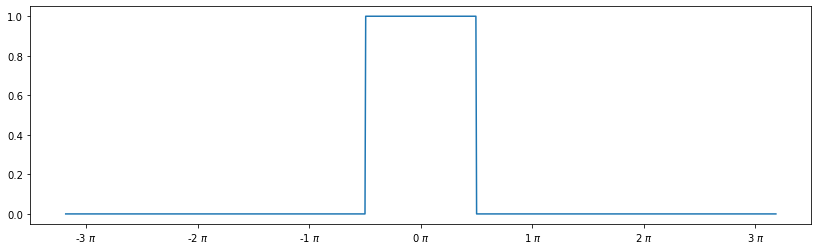

In [1]:
#Esta celda genera una impulso rectangular continuo en el dominio el tiempo
#Obviamente no podemos hacer algo continuo de verdad
#por lo que generamos una señal discreta que simula ser continua
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
plt.rcParams["figure.figsize"] = (14,4) #dimensiones por defecto al plotear (width, height)
def create_signal(muestras):
    return [1 if -np.pi/2<i<np.pi/2 else 0 for i in muestras]

#La función linspace divide un rango (ej. -10, 10) en 'n' trozos (ej.1000) equiespaciados
#muy útil para simular un continuo
muestras=np.linspace(-10,10, 1000)
f,ax=plt.subplots()#Lo creo así para tener acceso a los ejes (ax)

#cambio el eje de las x para que vaya en función de múltiplos de pi
ax.plot(muestras/np.pi, create_signal(muestras))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))

Importamos las dependencias necesarias de Sympy y creamos el impulso rectangular a través de Sympy


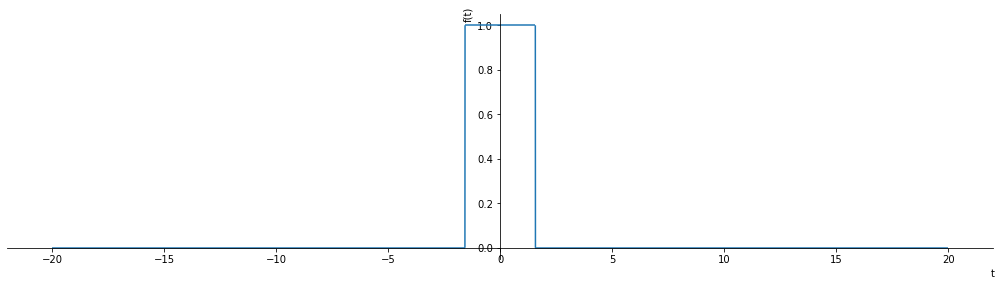

In [2]:
import sympy as sp
import matplotlib
from sympy.abc import  t
from IPython.display import display

sp.init_printing()#Selecciona el mejor modo de impresión para sympy de los disponibles

#IMPORTANTE la siguiente sentencia es necesaria para poder resolver la integral con Sympy,
# ya que si la F cuadra en el denominador, sympy no resuelve la integral y la deja 
# en la forma original por la posibilidad de que F=0 y cause una indeterminada.
#Esto pasa, por ejemplo, en los ejemplos en los que al resolver la integral tenemos un sinc
#, ya que sinc tiene una singularidad en 0
F = sp.symbols('F', nonzero=True)


#Creamos el impulso rectángulo
#Solo tenemos 2 opciones por lo que lo resolvemos con Piecewise 
#con formato IF-ELSE
def f(t):
    return sp.Piecewise((1, sp.Abs(t)<=sp.pi/2),(0,True))

#Visualizamos la señal en un rango concreto de t
#Esta es la señal creada por nosotros pero NO es la transformada
sp.plot(f(t), (t, -20, 20))


Empleamos la función de Sympy para el cálculo de la transformada pasando como argumentos la función, la variable simbólica de la que depende la función y una variable simbólica para representar la frecuencia

In [3]:
ft=sp.fourier_transform(f(t),t,F)
display(ft)
#En este caso no vemos la diferencia pero "simplify()" nos simplifica, si es posible el resultado
#A veces para repetir lo que vemos en la teoría necesitamos hacerlo
display(ft.simplify())

Por último podemos visualizar el espectro de frecuencia. Esta señal ya la conocemos de la teoría y sabemos que se puede simplificar en una seno cardinal *sinc* y vamos a comprobar que se visualiza como tal:

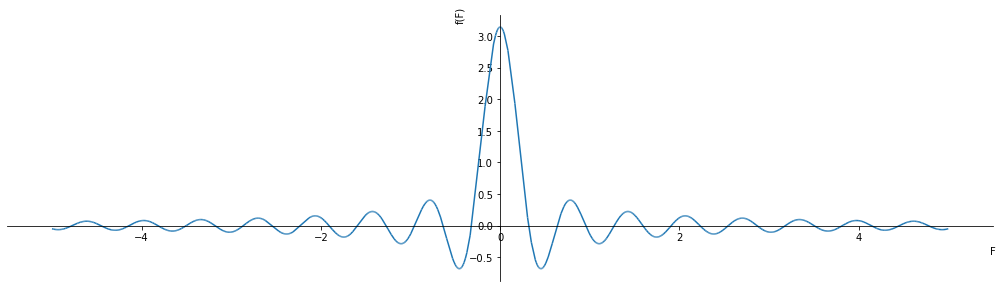

In [4]:
#Damos un rango de F para visualizar
sp.plot(ft, (F, -5, 5))

#### Transformada inversa
Si tenemos la representación en el dominio de la frecuencia, podemos aplicar la transformada inversa para recuperar la secuencia en el dominio del tiempo


$\large  x(t)=\int\limits_{-\infty}^{\infty} X(F)e^{j2\pi Ft}dF$

Para realizarlo con Sympy tenemos [inverse_fourier_transform](https://docs.sympy.org/latest/modules/integrals/integrals.html?highlight=fourier#sympy.integrals.transforms.inverse_fourier_transform)

<code>
    inverse_fourier_transform(F, k, x, **hints)
 </code>
 
 
 * **$F$** representa la transforamda de Fourier
 * **k**:  es la variable de frecuencia que hemos empleado para calcular la transformada. En el ejemplo y en la teoría la representamos con F
 * **x**: representa la muestra temporal. En nuestro ejemplo estamos usando *t* 
 
**Nota**: las variables tienen los nombres que aparecen en el API de Sympy

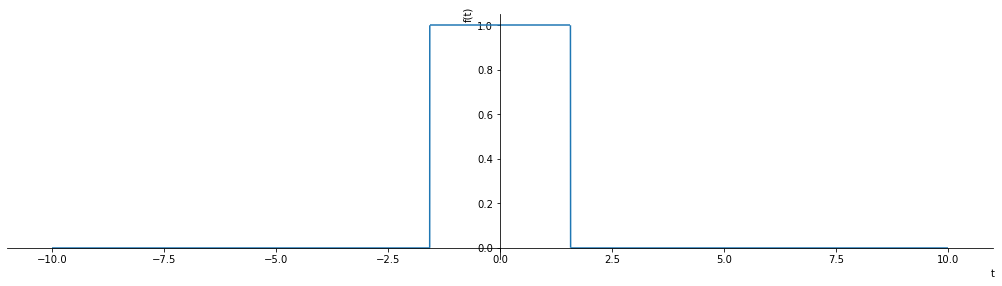

In [5]:
ft_inv=sp.inverse_fourier_transform(ft, F, t)
sp.plot(ft_inv,(t,-10,10))

#### Ejemplo de la señal rectangular más genérica

En las clases de teoría a veces encontramos la señal en el dominio del tiempo en base a valores abstractos. Podemos trabajar con ellos y también podemos darle valores a las variables para poder visualizar casos concretos y dejando solo una "libre" que varíe en el plot (ej. tiempo):  

⎧             τ
⎪A  for │t│ ≤ ─
⎨             2
⎪              
⎩0   otherwise 

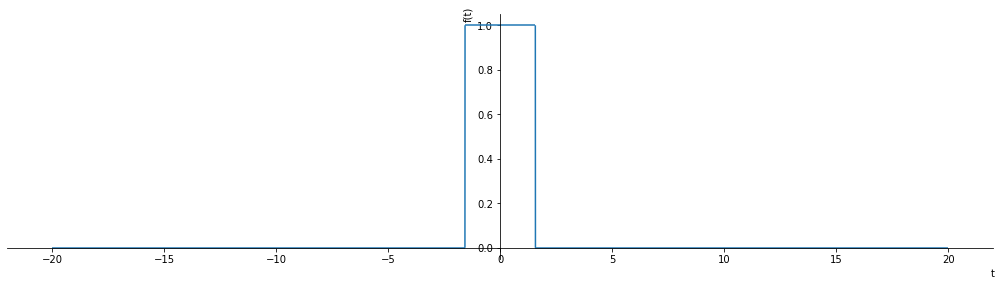

In [6]:
#Ejemplo visto en la teoría
#Creamos las variables simbólicas. Tenemos que darle "pistas" a sympy de como
#son esas variables para que luego pueda resolver las operaciones
#en Sympy podemos añadir "assumptions" a los símbolos
# https://docs.sympy.org/latest/modules/core.html#module-sympy.core.assumptions

tau, A=sp.symbols('tau, A', integer=True, positive=True )
def f2(t):
    return sp.Piecewise((A, sp.Abs(t)<=tau/2),(0,True))


display(f2(t))

#le podemos dar valores concretos a A y a tau para visualizar
sp.plot(f2(t).subs([(A,1), (tau, sp.pi)]),(t, -20, 20) )


In [7]:
#El resultado es similar al ejemplo anterior pero en este caso tenemos variables que tenemos que concretar
ft2=sp.fourier_transform(f2(t),t,F)
display(ft2)

Una vez obtenida la transformada podríamos darle valores para poder visualizar el espectro de la misma forma que en el caso anterior

**Nota**: Se pueden substituir varias variables simultáneamente con un array de tuplas
<code>
a.subs([(var1, value1),(var2, value2),...,(var:n, value_n)])
</code>



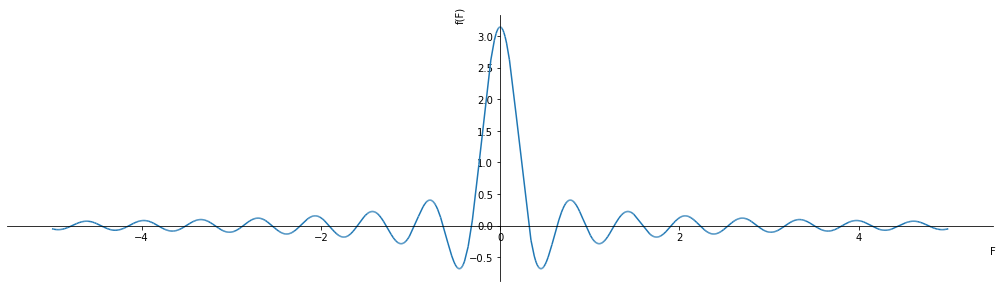

In [8]:
sp.plot(ft2.subs([(A,1),(tau,sp.pi)]), (F, -5, 5))

Fijaos que la amplitud máxima que coge es $A\tau$. En este caso $1\pi=3.14159...$



Es interesante ver el efecto de la transformada de Fourier de un impulso rectangular para diferentes valores de la anchura. 

Mayor ancho de impulso, más concentrado el espectro

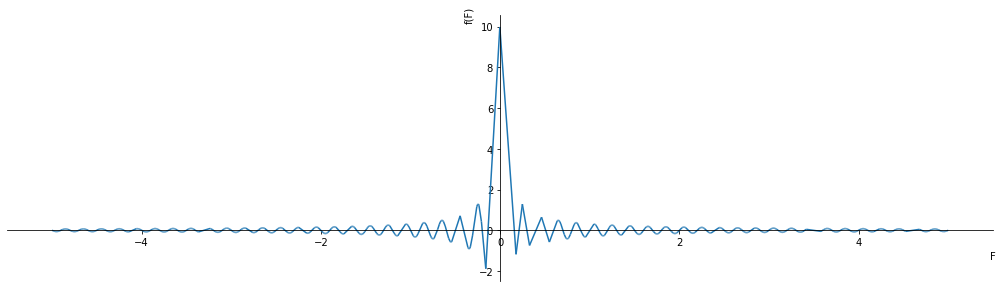

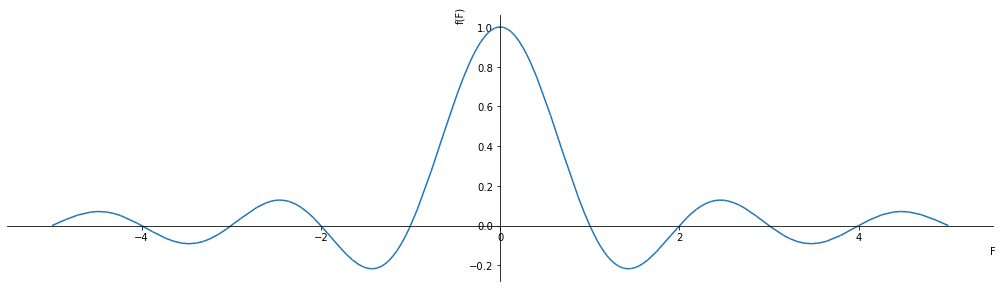

In [9]:
sp.plot(ft2.subs([(A,1),(tau,10)]), (F, -5, 5))
sp.plot(ft2.subs([(A,1),(tau,1)]), (F, -5, 5))

Podemos aplicar la transformada inversa para recuperar la secuencia en el dominio del tiempo:

$\large  x(t)=\int\limits_{-\infty}^{\infty} X(F)e^{j2\pi Ft}dF$



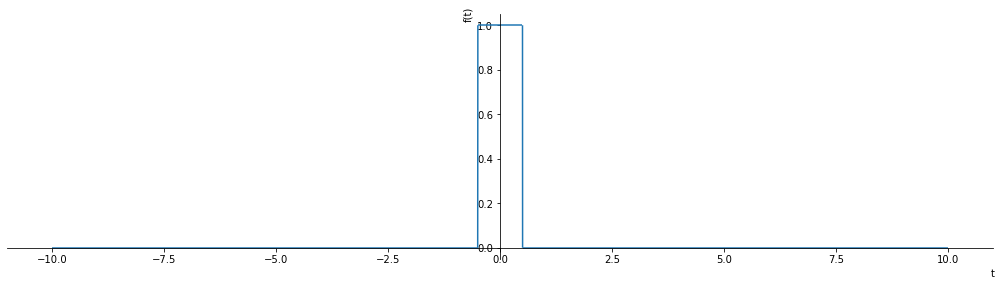

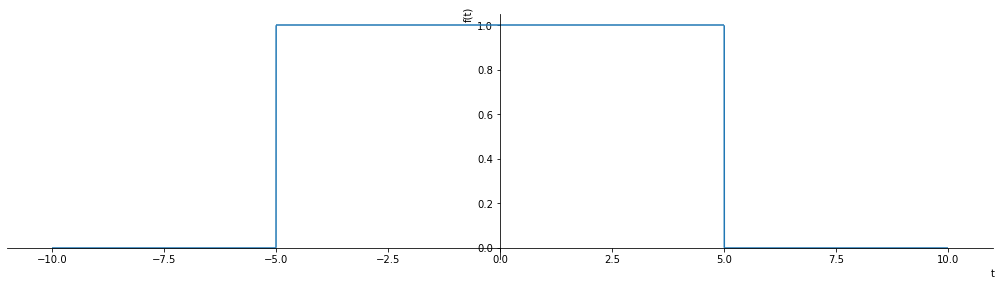

In [10]:
ft2_inv2=sp.inverse_fourier_transform(ft2.subs([(A,1),(tau,1)]), F, t)
sp.plot(ft2_inv2,(t,-10,10))

ft2_inv=sp.inverse_fourier_transform(ft2.subs([(A,1),(tau,10)]), F, t)
sp.plot(ft2_inv,(t,-10,10))

## Ejercicio

La relación de Parseval para señales aperiódicas de energía finita expresa el principio de conservación de la energía en los dominios del tiempo y de la frecuencia.


$E_x=\int\limits_{-\infty}^{\infty}|x(t)|^2 dt=\int\limits_{-\infty}^{\infty}|X(F)|^2 dF$


Calcula la energía para el impulso rectángulo mostrado en el primer ejemplo:

* Desde el dominio del tiempo
* Desde el dominio de la frecuencia
* Compara que da el mismo valor


**Nota:** el símbolo de infinito en sympy es

<code>sp.oo</code>

Dos veces la letra 'o' en minúscula

**Nota 2:** Si implementáis una función que recibe los límites de la integral, dependiendo del problema, puede ser interesante restringir dichos límites y que no sea siempre $(-\infty,\infty)$, tal y como hacemos a mano (ej. es siempre 0 fuera de un intervalo concreto)

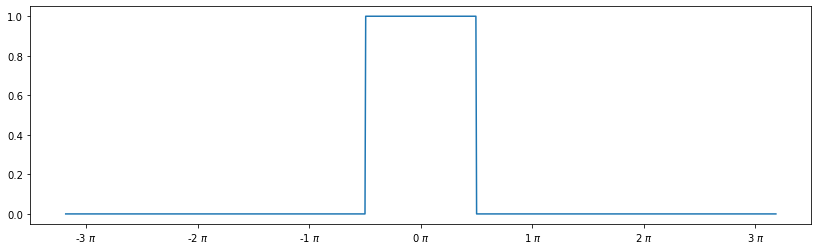

In [11]:
## RECORDATORIO Secuencia que representa el impulso rectángulo
def create_signal(muestras):
    return [1 if -np.pi/2<i<np.pi/2 else 0 for i in muestras]

#La función linspace divide un rango (ej. -10, 10) en 'n' trozos (ej.1000) equiespaciados
#muy útil para simular un continuo
muestras=np.linspace(-10,10, 1000)
f,ax=plt.subplots()#Lo creo así para tener acceso a los ejes (ax)

#cambio el eje de las x para que vaya en función de múltiplos de pi
ax.plot(muestras/np.pi, create_signal(muestras))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))

In [12]:
#Implementación ejercicio
def f(t):
    return sp.Piecewise((1, sp.Abs(t)<=sp.pi/2),(0,True))

def energia_tiempo(xt, limits):
    return sp.integrate(sp.Abs(xt)**2, limits)

def energia_frecuencia(XF, limits):
    return sp.integrate(sp.Abs(XF)**2, limits)


print("Energía calculada desde el dominio del tiempo (limites: -pi/2 a pi/2):")
display(energia_tiempo(f(t), (t, -sp.pi/2, sp.pi/2)))
print("Energía calculada desde el dominio del tiempo (limites: -oo a oo):")
display(energia_tiempo(f(t), (t, -sp.oo, sp.oo)))
print("Energía calculada desde el dominio de la frecuencia:")
display(energia_frecuencia(sp.fourier_transform(f(t),t,F), (F, -sp.oo, sp.oo)))

Energía calculada desde el dominio del tiempo (limites: -pi/2 a pi/2):


Energía calculada desde el dominio del tiempo (limites: -oo a oo):


Energía calculada desde el dominio de la frecuencia:


## Ejercicio

Calcula y visualiza (ej.entre -10, 10) el espectro de densidad de energía para el impulso escalón

$S_{xx}=|X(F)|^2$

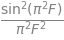

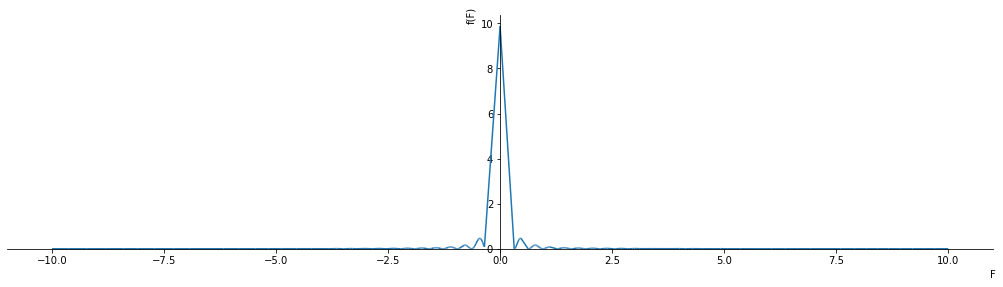

In [13]:
#Implementación ejercicio
def espectro_densidad_energia(XF):
    return sp.Abs(XF)**2

espectro = espectro_densidad_energia(sp.fourier_transform(f(t),t,F))
display(espectro)
sp.plot(espectro, (F, -10, 10))

## Ejercicio

La integral del espectro de energía para todas las frecuencias nos proporciona la energía total de la señal (la hemos calculado antes). Si concretamos una banda de frecuencias podemos saber la energía de la señal en dicha banda.

La energía de la señal $x(t)$ en la banda de frecuencias $F_1<=F<=F_1+\Delta F$ es:

$\int\limits_{F_1}^{F_1+\Delta F}S_{xx}dF$


* Crea una  función que permita obtener la energia de la señal en una banda concreta de frecuencias
    * Podéis probar con la banda $-\infty,0$  o con   $ 0, \infty $, ya que sabéis que tiene que dar $\frac{\pi}{2}$

**Nota:** Si lo probáis en otro rango os aparecerá una ecuación que podéis resolver con:
```Python
sp.N(exp)
```
[sp.N()](https://docs.sympy.org/latest/modules/evalf.html) realiza una evaluación aproximada para obtener un número flotante





In [14]:
#Implementación ejercicio
def espectro_densidad_energia_banda(espectro, F1, F2):
    return sp.integrate(espectro, (F, F1, F2))


energia = espectro_densidad_energia_banda(espectro, -sp.oo, 0)
display(espectro_densidad_energia_banda(espectro, -sp.oo, 0))
display(sp.N(energia))

## Ejercicio

Cálcula la transformada de Fourier para la siguiente señal (decaimiento exponencial por la derecha):

$\large x(t)= e^{-at}u(t), \color{red}{a>0}$


* Crea la función que genera la señal.  La función para crear la señal es una combinación de 2 partes. 
    * Sympy tiene ya creada la función escalón ($u[n]$) [heaviside](https://docs.sympy.org/latest/modules/functions/special.html#heaviside)
    * Usa la función escalón de sympy como parte de la función que genera la señal 
    * Crea el símbolo $a$ con las restricciones (*assumptions*) necesarias (entero positivo mayor que cero)

* Visualiza la señal en el intervalo (-20,20) dando un valor a $a$
* Crea el espectro de módulo de la señal ($|X(F)|$). Ten en cuenta el resultado de la transformada para crear la expresión que represente dicho espectro y que tendrá como parte de esa expresión el símbolo $F$
    * visualiza el espectro de módulo en el intervalo (-4,4)
    * **Pista**: el resultado de la transformada contiene un complejo en forma binómica
* Crea el espectro de fase de la señal, $\Theta(𝐹)$. Ten en cuenta el resultado de la transformada para crear la expresión que represente dicho espectro y que tendrá como parte de esa expresión el símbolo 𝐹
    * visualiza el espectro de fase en el intervalo (-4,4)
    


**Nota**: La creación de nuestra propia función escalón con *Piecewise* no parece funcionar en todas las versiones de Sympy generando una transformada de Fourier no resuelta en forma de Piecewise (con diferentes opciones dependiendo de $t$). 
**Importante**: Utiliza la función que ya proporciona Sympy [heaviside](https://docs.sympy.org/latest/modules/functions/special.html#heaviside)

**Nota 2**: formulas necesarias

$z=a+bj$

$r=\sqrt{a^2 + b^2}$

$\theta= arctan(\frac{b}{a})$

$z=\frac{a+bj}{c+dj}, \theta(z)= arctan(\frac{b}{a})-arctan(\frac{d}{c})$


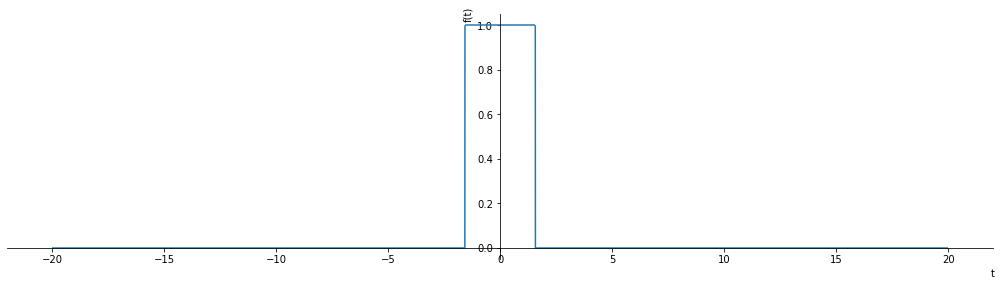

In [15]:
#Implementación ejercicio
#Crea y visualiza la función pedida
a = sp.symbols('a', positive=True, nonzero=True)

def f1(t):
    return sp.exp(-a*t)*sp.Heaviside(t)

sp.plot(f(t).subs([(a, 1)]), (t, -20, 20))

Transformada de Fourier:


Espectro de módulo:


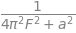

Visualización:


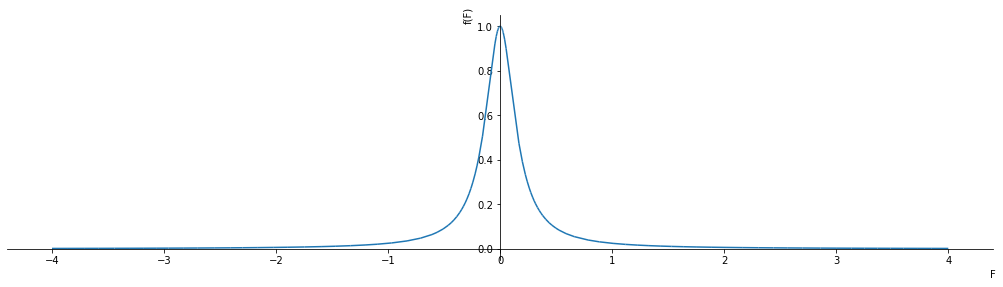

In [16]:
#Implementación ejercicio
#Crea la transformada de Fourier para poder a continuación calcular el espectro de módulo
#Si se visualiza la transformada veréis que tenéis un cociente de complejos en forma binómica
#Podéis  calcular el módulo a través de las fórmulas
def espectro_modulo():
    return 1/sp.sqrt((2*sp.pi*F)**2 + (a)**2)


print("Transformada de Fourier:")
ft = sp.fourier_transform(f1(t), t, F)
display(ft)

espectro_modulo = sp.Abs(espectro_modulo())**2
print("Espectro de módulo:")
display(espectro_modulo)
print("Visualización:")
sp.plot(espectro_modulo.subs([(a,1)]), (F, -4, 4))

Transformada de Fourier:


Espectro de fase:


Visualización:


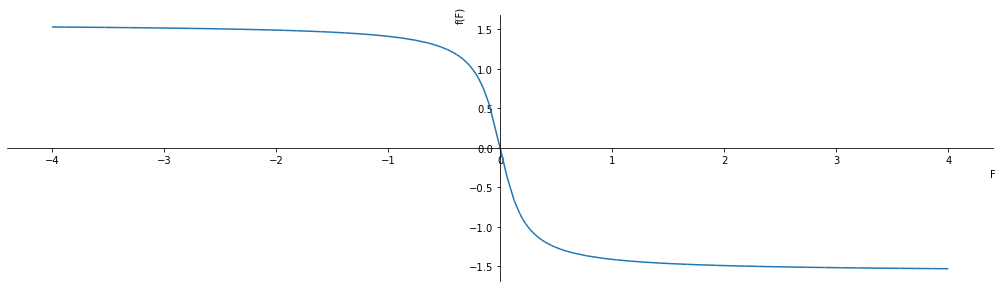

In [17]:
#Implementación ejercicio
#Crea la transformada de Fourier para poder a continuación calcular el espectro de fase
#Si se visualiza la transformada veréis que tenéis un cociente de complejos en forma binómica
#Podéis  calcular la fase a través de las fórmulas
def espectro_fase():
    return sp.atan(0/1)-sp.atan(2*sp.pi*F/a)


print("Transformada de Fourier:")
ft = sp.fourier_transform(f1(t), t, F)
display(ft)

espectro_fase = espectro_fase()
print("Espectro de fase:")
display(espectro_fase)
print("Visualización:")
sp.plot(espectro_fase.subs([(a, 1)]), (F, -4, 4))

## Ejercicio

Repetir el ejercicio anterior para la señal (decaimiento exponencial por la izquierda):

$x(t)=e^{|a|t}u(-t), \color{red}{a>0}$

Prácticamente se puede copiar todo el ejercicio anterior.

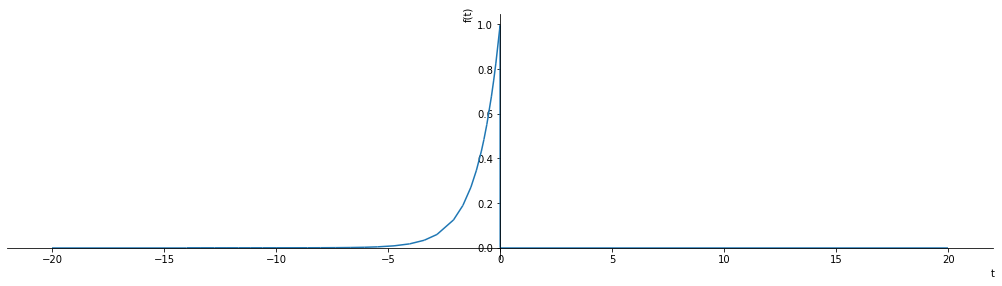

Transformada de Fourier:


Espectro de módulo:


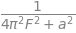

Visualización:


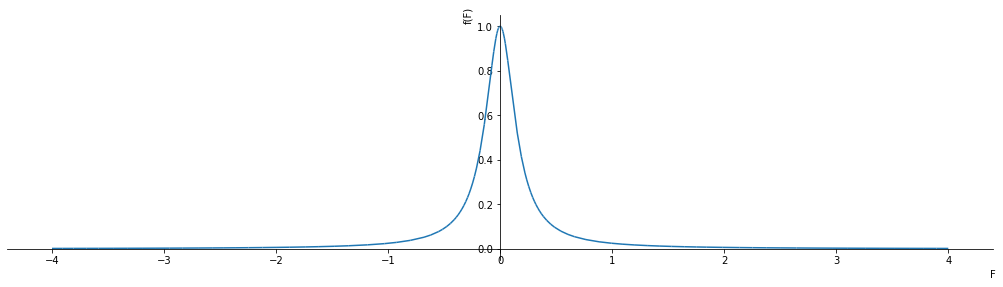

Transformada de Fourier:


Espectro de fase:


Visualización:


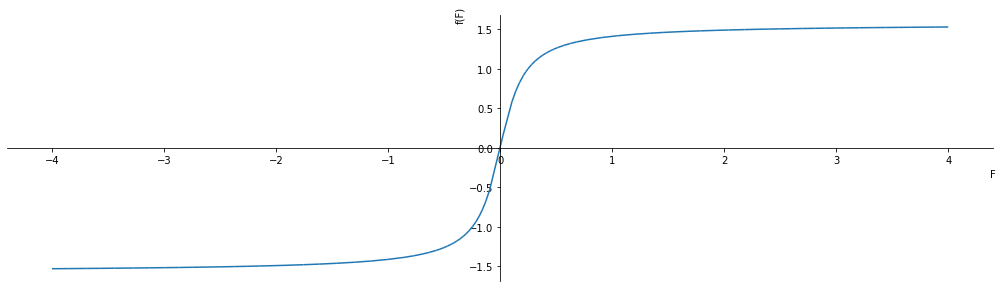

In [18]:
#Implementación ejercicio
a = sp.symbols('a', positive=True, nonzero=True)

def f2(t):
    return sp.exp(sp.Abs(a)*t)*sp.Heaviside(-t)

sp.plot(f2(t).subs([(a, 1)]), (t, -20, 20))


def espectro_modulo():
    return 1/sp.sqrt((2*sp.pi*F)**2 + (a)**2)


print("Transformada de Fourier:")
ft = sp.fourier_transform(f2(t), t, F)
display(ft)

espectro_modulo = sp.Abs(espectro_modulo())**2
print("Espectro de módulo:")
display(espectro_modulo)
print("Visualización:")
sp.plot(espectro_modulo.subs([(a,1)]), (F, -4, 4))


def espectro_fase():
    return sp.atan(0/-1)-sp.atan(2*sp.pi*F/-a)


print("Transformada de Fourier:")
ft = sp.fourier_transform(f2(t), t, F)
display(ft)

espectro_fase = espectro_fase()
print("Espectro de fase:")
display(espectro_fase)
print("Visualización:")
sp.plot(espectro_fase.subs([(a, 1)]), (F, -4, 4))

## Ejercicio

Calcular y visualizar la transformada de Fourier para la siguiente señal (decaimiento exponencial por los dos lados):

$x(t)=e^{-a|t|}, \color{red}{a>0}$


* Sumar las transformadas calculadas en los ejercicios anteriores (decaimiento exponencial por la izquierda y por la derecha). Si se simplifica (*sp.simplify()*) la suma se debería de obtener la misma expresión que para la transformada para la señal con decaimiento exponencial por los dos lados debido a la **propiedad de linealidad**


Visualización de x(t):


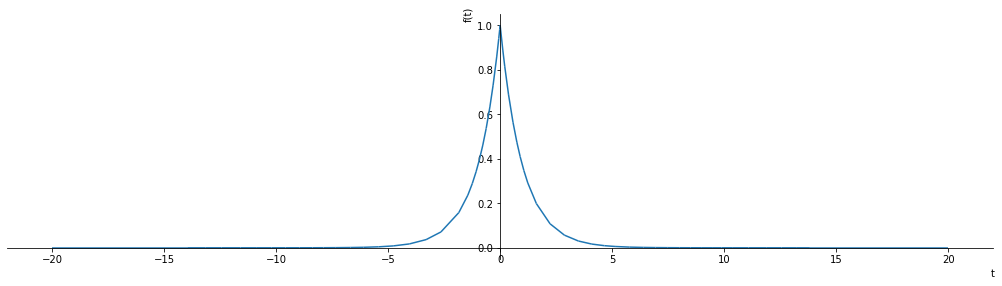

Tranformada de Fourier:


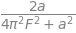

Visualización de X(F):


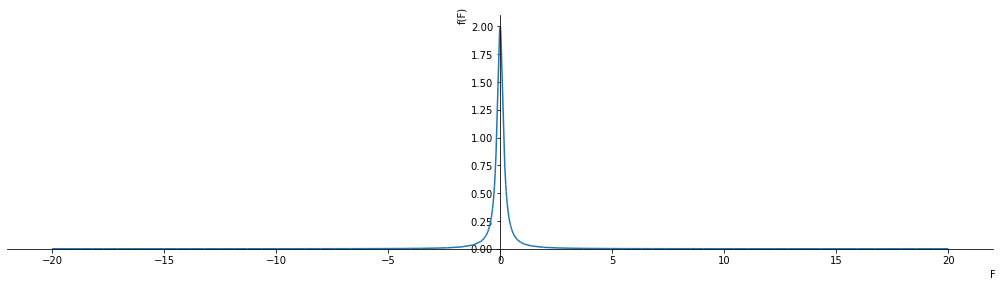

Suma:


Suma simplificada:


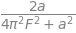

Visualización de la suma:


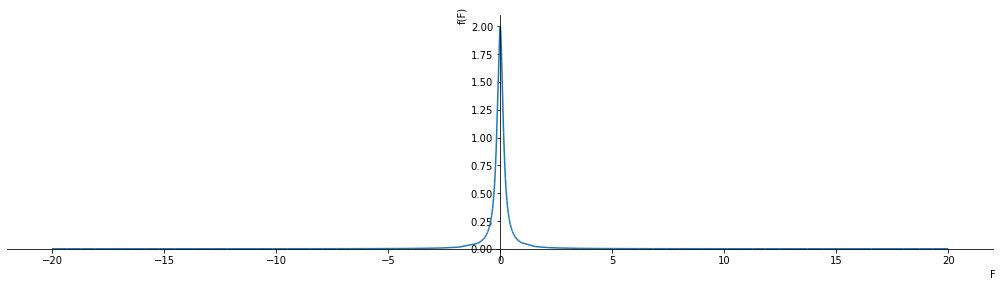

In [19]:
#Implementación ejercicio
a = sp.symbols('a', positive=True, nonzero=True)

def f(t):
    return sp.exp(-a*sp.Abs(t))

print("Visualización de x(t):")
sp.plot(f(t).subs([(a,1)]), (t, -20, 20))

ft = sp.fourier_transform(f(t), t, F)
print("Tranformada de Fourier:")
display(ft)
print("Visualización de X(F):")
sp.plot(ft.subs([(a,1)]), (F, -20, 20))


# Suma de las transformadas de Fourier:
suma = sp.fourier_transform(f1(t), t, F) + sp.fourier_transform(f2(t), t, F)
print("Suma:")
display(suma)
print("Suma simplificada:")
display(sp.simplify(suma))
print("Visualización de la suma:")
sp.plot(suma.subs([(a,1)]), (F, -20, 20))